# Used Car Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C://Users//admin//Desktop//Car-Price-Prediction-Deployment//Dataset//Car_Details.csv")

# Data Overview

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


## Checking Null Value

In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Dataset Does Not Contain Any Missing Data.

## Checking Outliers

Analysing distribution of all continious features in our dataset.

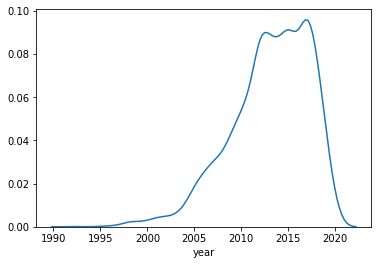

In [8]:
sns.distplot(df['year'] ,hist = False)

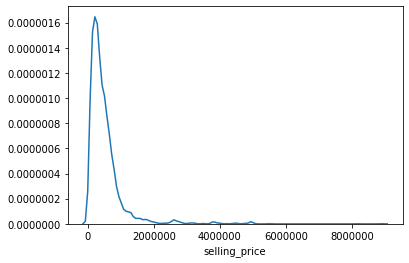

In [9]:
sns.distplot(df['selling_price'] , hist = False)

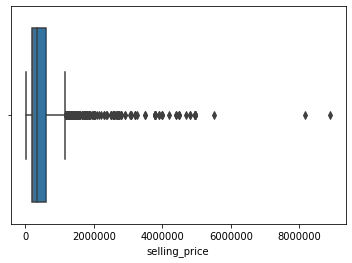

In [10]:
sns.boxplot(df['selling_price'])

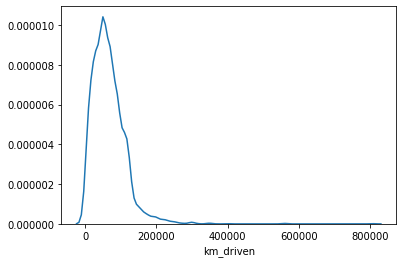

In [11]:
sns.distplot(df['km_driven'] , hist = False)

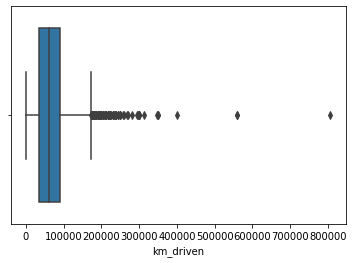

In [12]:
sns.boxplot(df['km_driven'])

#### As Per The Above Obsevation "Selling Price" & "Km_driven" Contains Some Outliers Which Will Be Removed.

# Exploratory Data Analysis

In [13]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [14]:
df.year.nunique()

27

This dataset contains car details of past 27years.

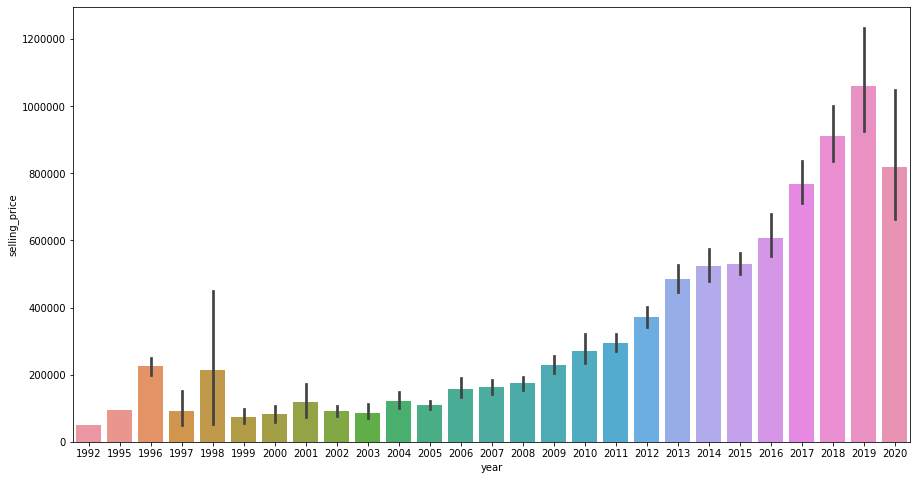

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x = "year" , y = "selling_price" , data = df) 

The slope shows that as the car gets older its price also decreases.
older the car, Lower the price. Which Makes Sense.

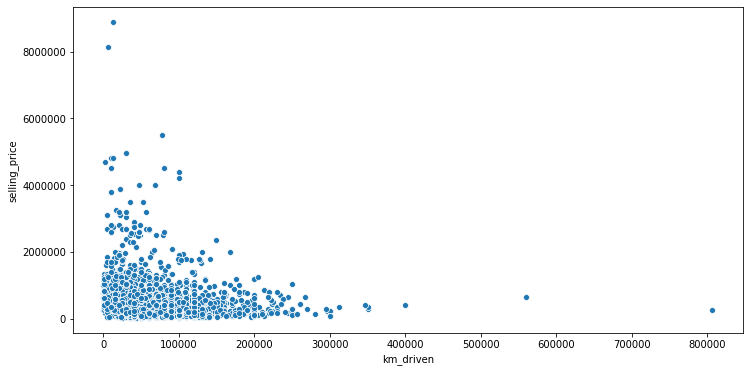

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='km_driven' , y='selling_price' , data = df)

Cars which are driven less kilometers tends to get higher selling amount, also, cars which are driven longer gets less seling amount as compared to cars which are driven less kilometers.

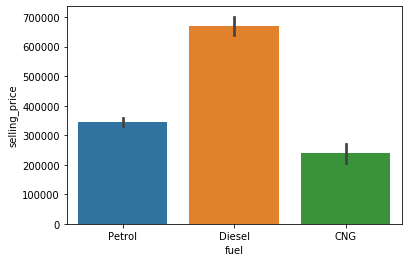

In [17]:
sns.barplot(x = 'fuel' , y = 'selling_price' , data = df)

Can be clearly seen cars having Fuel Type "Diesel" gets highest selling price, Followed by Petrol , CNG.

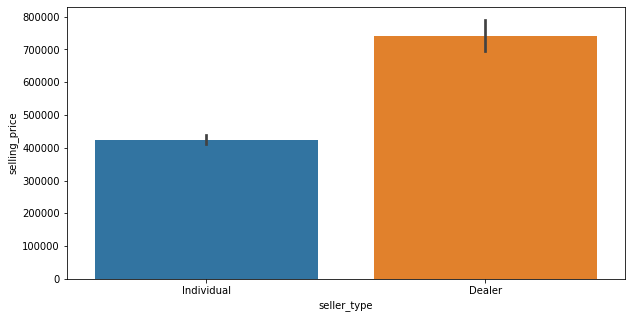

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'seller_type' , y = 'selling_price' , data = df)

If you sell your car to Dealer he will pay you more as compared to Individual person.

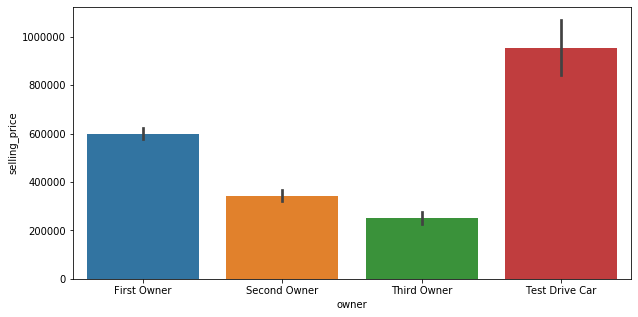

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'owner', y = 'selling_price' , data = df )

Cars whch are used for test drives in showrooms gets highest selling price, Firts owner get less than Test drive cars type but more than Second, Third and Forth car owener

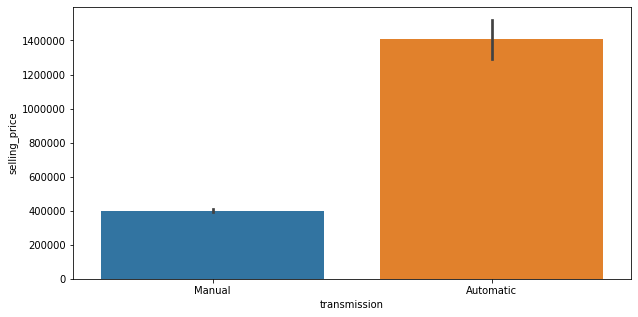

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'transmission', y = 'selling_price' , data = df )

Cars which runs automatically gets higher selling price as compared to manual cars.

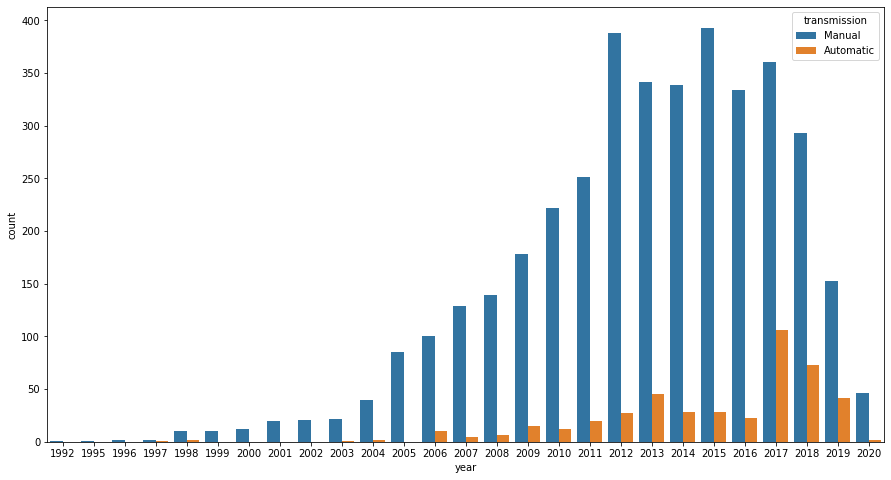

In [21]:
# When Automatic cars came into existance?

plt.figure(figsize=(15,8))
sns.countplot(x = "year" , hue = 'transmission' , data = df) 

As per the data Automatic cars came inoto existance in year 1997 but they started becoming more common from year 2006.
Still number of manual cars are not much.

## Outliers Treatment

In [22]:
ul_s = df['selling_price'].mean() + 3 * df['selling_price'].std()
ll_s = df['selling_price'].mean() - 3 * df['selling_price'].std()
df = df[(df['selling_price']>ll_s) & (df['selling_price']<ul_s)]

In [23]:
ul_k = df['km_driven'].mean() + 3 * df['km_driven'].std()
ll_k = df['km_driven'].mean() - 3 * df['km_driven'].std()
df = df[(df['km_driven']>ll_k) & (df['km_driven']<ul_k)]

In [24]:
df.shape

(4194, 8)

146 Records has been removed as an outlier.

All data points from feature "selling_price" , "km_driven" which lies away from their 3rd Standard Deviation has been removed

# Feature Engineering

In [25]:
df.name.nunique()

1443

Name feature contains names of the cars , it has 1491 unique values and also name feature is not importan for model building, Hence we will drop name column.

In [26]:
# Removing name column
df = df.drop('name' , axis = 1)

#### Finding Categorical Features

In [27]:
df.select_dtypes(include = 'object').head()

,fuel,seller_type,transmission,owner
0,Petrol,Individual,Manual,First Owner
1,Petrol,Individual,Manual,First Owner
2,Diesel,Individual,Manual,First Owner
3,Petrol,Individual,Manual,First Owner
4,Diesel,Individual,Manual,Second Owner


In [28]:
df.seller_type.value_counts()

Individual    3159
Dealer        1035
Name: seller_type, dtype: int64

we will perform one hot encoding for feature "fuel" as categories in that feature does have relationship with themselves.

And for columns "transmission" , "owner" and ""Seller_type" we will perform label encoding

In [29]:
# Performing One Hot Encoding for Nominal Variables
df_new = pd.get_dummies(data = df , columns = ['fuel'] , drop_first = True)

In [31]:
df_new.head()

,year,selling_price,km_driven,seller_type,transmission,owner,fuel_Diesel,fuel_Petrol
0,2007,60000,70000,Individual,Manual,First Owner,0,1
1,2007,135000,50000,Individual,Manual,First Owner,0,1
2,2012,600000,100000,Individual,Manual,First Owner,1,0
3,2017,250000,46000,Individual,Manual,First Owner,0,1
4,2014,450000,141000,Individual,Manual,Second Owner,1,0


One Hot Encoding has been converted specified features to dummy variabls.

In [32]:
df.seller_type.value_counts()

Individual    3159
Dealer        1035
Name: seller_type, dtype: int64

In [33]:
df.owner.value_counts()

First Owner       2720
Second Owner      1084
Third Owner        373
Test Drive Car      17
Name: owner, dtype: int64

In [34]:
df.transmission.value_counts()

Manual       3840
Automatic     354
Name: transmission, dtype: int64

In [37]:
# Performing Lable Encoding for Ordinal Varibles.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['transmission'] = le.fit_transform(df['transmission'])
df_new['owner'] = le.fit_transform(df['owner'])
df_new['seller_type'] = le.fit_transform(df['seller_type'])

In [45]:
print("Seller_Type" ,df_new.seller_type.value_counts())
print("Owner" , df_new.owner.value_counts())
print("transmission" , df_new.transmission.value_counts())

Seller_Type 1    3159
0    1035
Name: seller_type, dtype: int64
Owner 0    2720
1    1084
3     373
2      17
Name: owner, dtype: int64
transmission 1    3840
0     354
Name: transmission, dtype: int64


#### ---------------------------------------------------

Seller Type -- (0 = Dealer) (1 = Individual) 


Owner -- (0 = First Owner ) (1 = Second Owner ) (2 = Third Owner) (3 = Test Drive Cars)

transmission -- (0 = Manual) (1 = Automatic)

In [46]:
df_new.head(3)

,year,selling_price,km_driven,seller_type,transmission,owner,fuel_Diesel,fuel_Petrol
0,2007,60000,70000,1,1,0,0,1
1,2007,135000,50000,1,1,0,0,1
2,2012,600000,100000,1,1,0,1,0


In [47]:
df_new.shape

(4194, 8)

In the beginning we had Total 7 features and now after performing feature engineering we have 8 features.

# Feature Selection

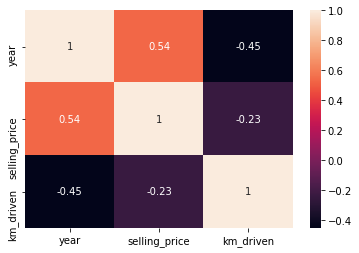

In [48]:
sns.heatmap(df.corr() , annot=True)

In [49]:
x = df_new.drop('selling_price' , axis = 1)
y = df_new.selling_price

In [50]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [51]:
print(model.feature_importances_)

[0.36049588 0.2608812  0.02615634 0.16560297 0.03542948 0.14715988
 0.00427424]


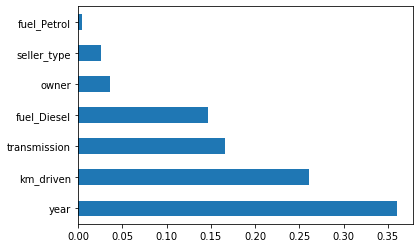

In [52]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

Since all features are important we will select all features for predictions.

In [53]:
df_new['year'] = 2020 - df_new['year']

In [54]:
df_new.head()

,year,selling_price,km_driven,seller_type,transmission,owner,fuel_Diesel,fuel_Petrol
0,13,60000,70000,1,1,0,0,1
1,13,135000,50000,1,1,0,0,1
2,8,600000,100000,1,1,0,1,0
3,3,250000,46000,1,1,0,0,1
4,6,450000,141000,1,1,1,1,0


In [55]:
df_new.to_csv("C://Users//admin//Desktop//Car-Price-Prediction-Deployment//Data_Preprocessing//processed_data.csv" , index = False)